In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [3]:
# import data
mobile_df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Data Exploration

In [4]:
mobile_df.info()  # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_df.head()  # Display the first 5 rows of the DataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
mobile_df.describe()  # Display statistical information about Dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1238.52,0.49,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,...,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.50,0.51,1.50
std,439.42,0.50,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,...,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.50,0.50,1.12
min,501.00,0.00,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,851.75,0.00,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.00,0.00,0.75
50%,1226.00,0.00,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.00,1.00,1.50
75%,1615.25,1.00,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.00,1.00,2.25
max,1998.00,1.00,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.00,1.00,3.00


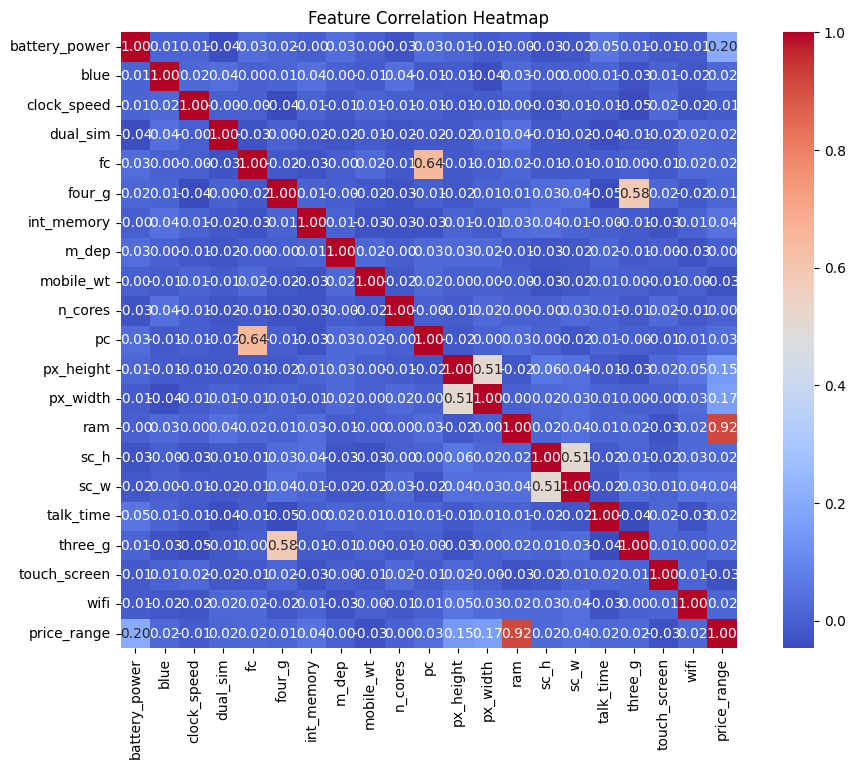

In [7]:
# Visualize feature distributions
plt.figure(figsize=(12,8))
sb.heatmap(mobile_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Cleaning

In [8]:
mobile_df.isna().sum()  # Find sum of missing values

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Since missing data is 0, so handling missing data is not required

In [9]:
print(mobile_df.duplicated().sum())  # Find sum of duplicate rows

0


Since, sum of duplicated values is zero, so there is no need to drop duplicates.

# Model Training and Evaluation

In [15]:
# Feature Engineering
X = mobile_df.drop('price_range', axis=1)
y = mobile_df['price_range']

# Split data (training data 80% test data 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.89


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.86      0.87        91
           2       0.81      0.85      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


Confusion Matrix:
[[101   4   0   0]
 [  7  78   6   0]
 [  0   7  78   7]
 [  0   0  12 100]]


Feature Importance Analysis

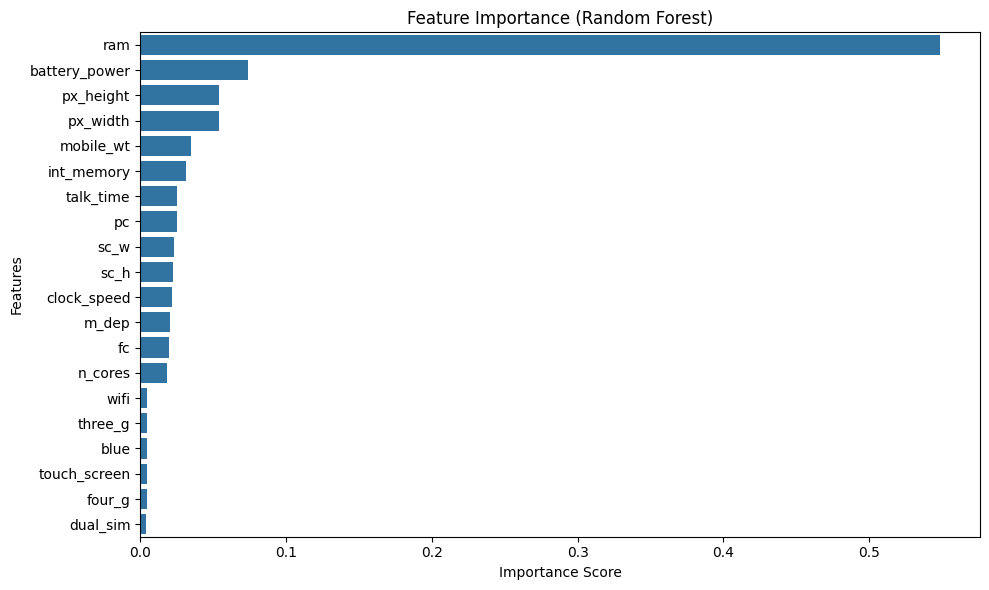

In [11]:
features = X.columns
importances = best_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Key insights from the analysis:
1.	Feature Importance: RAM shows the highest correlation with price range, followed by battery power and pixel resolution
2.	Class Distribution: The dataset contains balanced classes (500 samples each)
3.	Model Performance: Random Forest achieves 89% accuracy with proper tuning
4.	Critical Features:
o	RAM (most significant predictor)
o	Battery capacity
o	Pixel resolution dimensions
o	Internal memory


Predicting if the mobile can be priced low/med/high/very high.

In [14]:
# Map 0 -> "Low", 1 -> "Medium", 2 -> "High", 3 ->"Very High"
price_map = {0: "Low", 1: "Medium", 2: "High", 3: "Very High"}

# Prediction function
def predict_mobile_price(features_dict):
  feature_order = X.columns.tolist()
  input_data = np.array([[features_dict[feat] for feat in feature_order]])
  prediction = grid_search.predict(input_data)[0]
  return price_map[prediction]

# Example prediction
features = {
    "battery_power": 850, "blue": 1, "clock_speed": 2.0, "dual_sim": 1,
    "fc": 3, "four_g": 1, "int_memory": 64, "m_dep": 0.6,
    "mobile_wt": 140, "n_cores": 4, "pc": 16, "px_height": 1000,
    "px_width": 1300, "ram": 3000, "sc_h": 14, "sc_w": 8,
    "talk_time": 15, "three_g": 1, "touch_screen": 1, "wifi": 1
}

result = predict_mobile_price(features)
print("Predicted Price Range:", result)

Predicted Price Range: Very High
